In [1]:
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
data = pd.read_csv('twitter_training.csv')
data

,S.NO,AccountName,tweettype,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [3]:
data.shape

(74682, 4)

In [4]:
data.columns

Index(['S.NO', 'AccountName', 'tweettype', 'Content'], dtype='object')

In [5]:
data.describe()

,S.NO
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   S.NO         74682 non-null  int64 
 1   AccountName  74682 non-null  object
 2   tweettype    74682 non-null  object
 3   Content      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
data.isnull().sum()

S.NO             0
AccountName      0
tweettype        0
Content        686
dtype: int64

In [8]:
data.AccountName.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [9]:
data.tweettype.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [10]:
data['tweettype'].fillna(data['tweettype'].mode()[0], inplace=True)

In [11]:
# Clean text function
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'http\S+', '', text)  # Remove URLs
        text = re.sub(r'@\w+', '', text)  # Remove mentions
        text = re.sub(r'#\w+', '', text)  # Remove hashtags
        text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
        text = text.strip()  # Remove leading and trailing spaces
        return text
    else:
        return ""  # Return empty string for non-string values or NaN

In [12]:
data['cleaned_text'] = data['Content'].apply(clean_text)

In [13]:
# Sentiment analysis function (example)
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [14]:
# Apply sentiment analysis to the cleaned text column
data['sentiment'] = data['cleaned_text'].apply(get_sentiment)

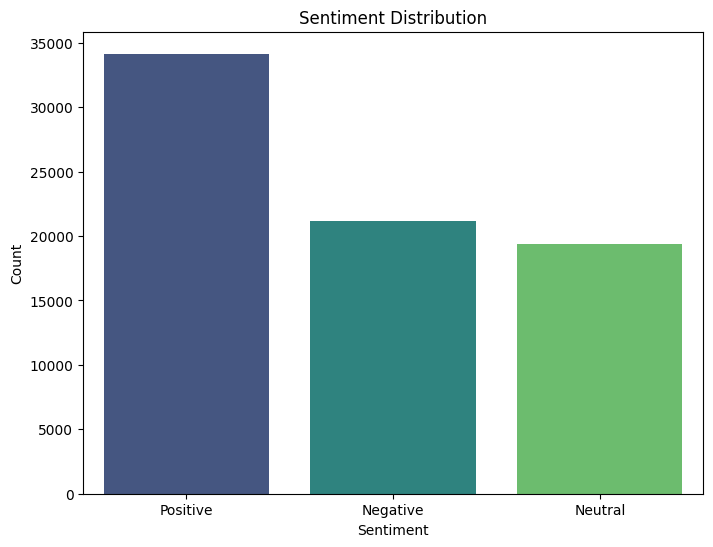

In [15]:
# Visualize sentiment distribution (example)
sentiment_counts = data['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [16]:
data.to_csv('twitter_training_clean.csv', index=False)
# importing file from a local folder
from google.colab import files
files.download('twitter_training_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>